In [ ]:
# enable autocomplete
%config Completer.use_jedi = False

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from geopy import distance

# Visualize cleaned data

## Read data

In [ ]:
df = pd.read_csv('data/citibike2018_clean.csv')

In [ ]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,72.0,W 52 St & 11 Ave,40.767272,-73.993929,505.0,6 Ave & W 33 St,40.749013,-73.988484,31956,Subscriber,1992,1
1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,72.0,W 52 St & 11 Ave,40.767272,-73.993929,3255.0,8 Ave & W 31 St,40.750585,-73.994685,32536,Subscriber,1969,1
2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,72.0,W 52 St & 11 Ave,40.767272,-73.993929,525.0,W 34 St & 11 Ave,40.755942,-74.002116,16069,Subscriber,1956,1
3,306,2018-01-01 15:40:13.3720,2018-01-01 15:45:20.1910,72.0,W 52 St & 11 Ave,40.767272,-73.993929,447.0,8 Ave & W 52 St,40.763707,-73.985162,31781,Subscriber,1974,1
4,306,2018-01-01 18:14:51.5680,2018-01-01 18:19:57.6420,72.0,W 52 St & 11 Ave,40.767272,-73.993929,3356.0,Amsterdam Ave & W 66 St,40.774667,-73.984706,30319,Subscriber,1992,1


## Distribution of user types

In [18]:
df['usertype'].value_counts(normalize=True).mul(100).rename('percent').reset_index()


,index,percent
0,Subscriber,89.600949
1,Customer,10.399051


## Distribution of trip duration

### Plain

<AxesSubplot:xlabel='tripduration', ylabel='Count'>

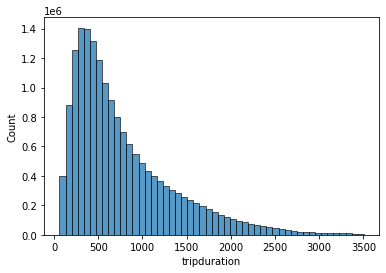

In [7]:
sns.histplot(data=df, x='tripduration', bins=50)

### By user type

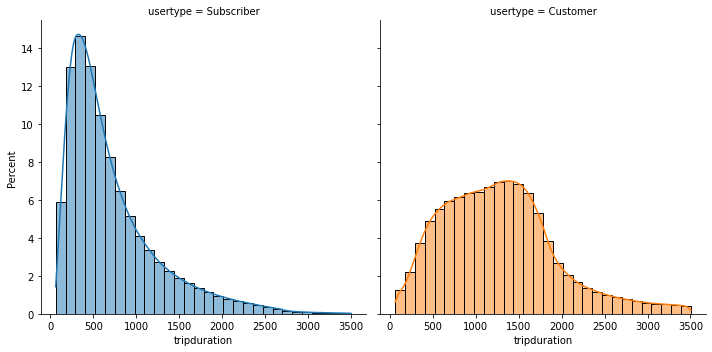

In [8]:
g = sns.FacetGrid(data=df, col='usertype', hue='usertype', sharex=True, sharey=True, height=5)
g.map(sns.histplot, 'tripduration', bins=30, stat='percent', kde=True)

## Distribution of start times

In [9]:
# extract hour, day, weekday and month from starttime

df['starthour'] = pd.to_datetime(df['starttime']).dt.hour
df['startday'] = pd.to_datetime(df['starttime']).dt.day
df['startmonth'] = pd.to_datetime(df['starttime']).dt.month
df['startweekday'] = pd.to_datetime(df['starttime']).dt.weekday

### Start hour

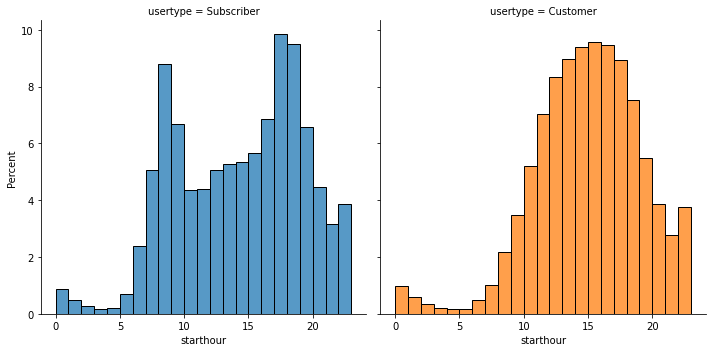

In [10]:
g = sns.FacetGrid(data=df, col='usertype', hue='usertype', sharex=True, sharey=True, height=5)
g.map(sns.histplot, 'starthour', bins=range(0,24), stat='percent')

### Start day

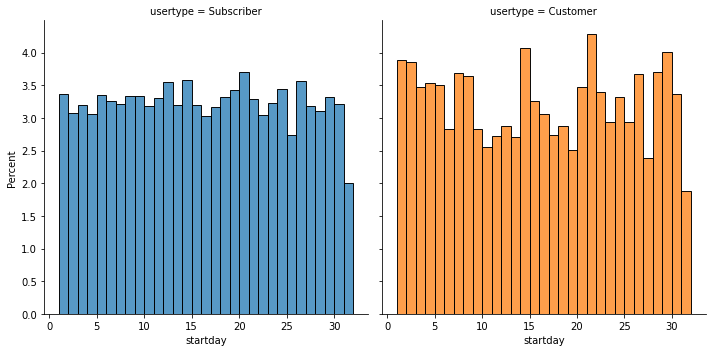

In [11]:
g = sns.FacetGrid(data=df, col='usertype', hue='usertype', sharex=True, sharey=True, height=5)
g.map(sns.histplot, 'startday', bins=range(1,33), stat='percent')

### Start weekday

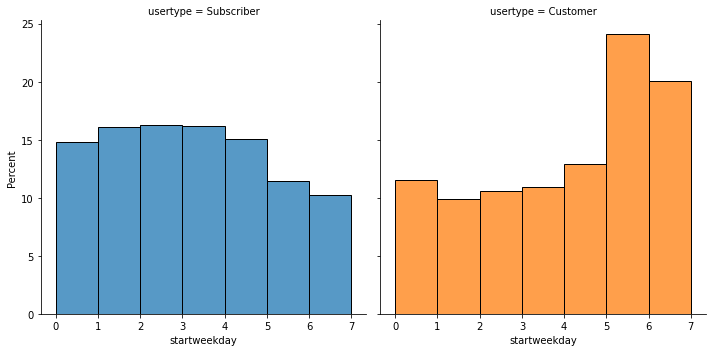

In [12]:
g = sns.FacetGrid(data=df, col='usertype', hue='usertype', sharex=True, sharey=True, height=5)
g.map(sns.histplot, 'startweekday', bins=range(0,8), stat='percent')

### Start month

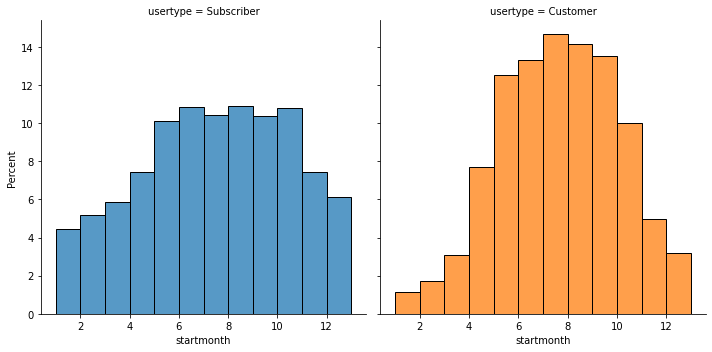

In [13]:
g = sns.FacetGrid(data=df, col='usertype', hue='usertype', sharex=True, sharey=True, height=5)
g.map(sns.histplot, 'startmonth', bins=range(1,14), stat='percent')

## Top 10 start stations

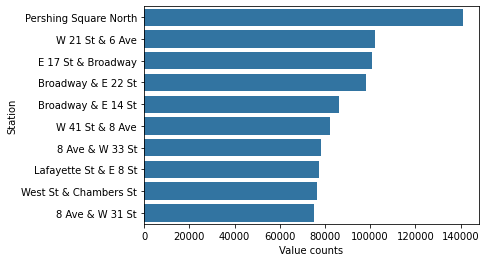

In [14]:
# plot top 10 stations for subscribers
g = sns.barplot(data=df.loc[df['usertype']=='Subscriber','start station name'].value_counts()[:10].reset_index(), y='index', x='start station name', orient='h', color = sns.color_palette()[0])
g.set_xlabel('Value counts')
g.set_ylabel('Station')
plt.show()

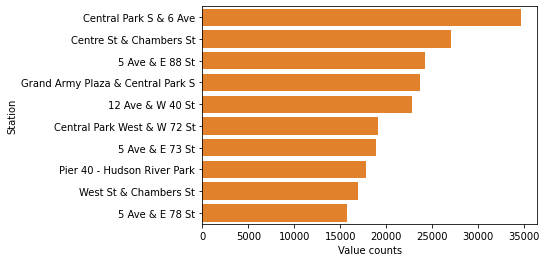

In [15]:
# plot top 10 stations for customers
g = sns.barplot(data=df.loc[df['usertype']=='Customer','start station name'].value_counts()[:10].reset_index(), y='index', x='start station name', orient='h', color = sns.color_palette()[1])
g.set_xlabel('Value counts')
g.set_ylabel('Station')
plt.show()

## Top 10 end stations

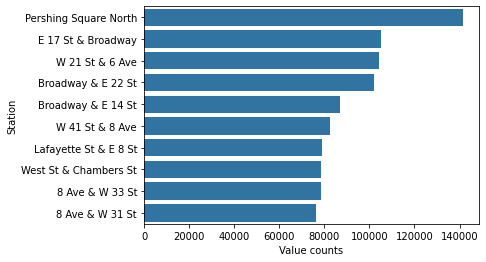

In [16]:
# plot top 10 stations for subscribers
g = sns.barplot(data=df.loc[df['usertype']=='Subscriber','end station name'].value_counts()[:10].reset_index(), y='index', x='end station name', orient='h', color = sns.color_palette()[0])
g.set_xlabel('Value counts')
g.set_ylabel('Station')
plt.show()

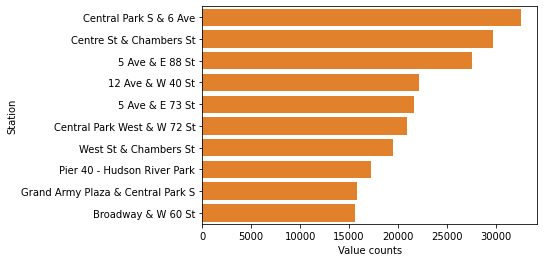

In [17]:
# plot top 10 stations for customers
g = sns.barplot(data=df.loc[df['usertype']=='Customer','end station name'].value_counts()[:10].reset_index(), y='index', x='end station name', orient='h', color = sns.color_palette()[1])
g.set_xlabel('Value counts')
g.set_ylabel('Station')
plt.show()

## Distribution of distance between start and end station

In [18]:
# calculate distance using geopy and (lat,long) of start and end station

df['geodesic_distance'] = df.apply(lambda row:distance.distance((row['start station latitude'],row['start station longitude']), (row['end station latitude'],row['end station longitude'])).km, axis=1)

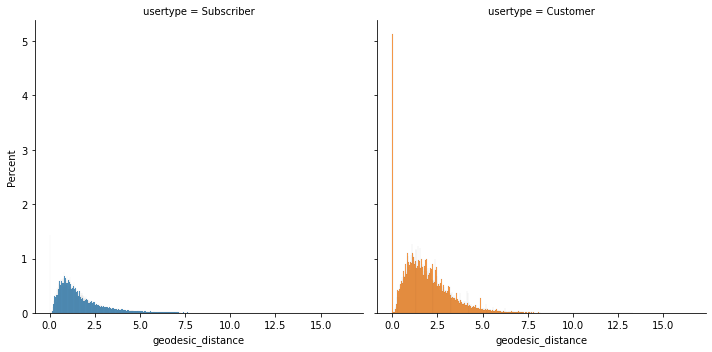

In [19]:
g = sns.FacetGrid(data=df, col='usertype', hue='usertype', sharex=True, sharey=True, height=5)
g.map(sns.histplot, 'geodesic_distance', stat='percent')

## Distribution of genders

<AxesSubplot:xlabel='gender', ylabel='count'>

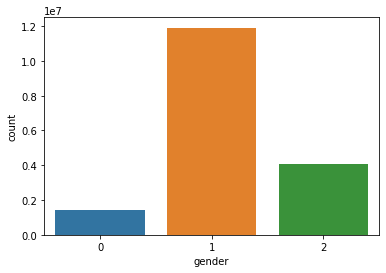

In [20]:
sns.countplot(data=df, x='gender')

<AxesSubplot:xlabel='gender', ylabel='count'>

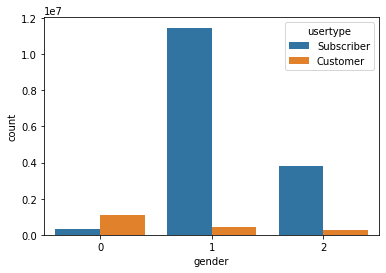

In [21]:
sns.countplot(data=df, x='gender', hue='usertype')

## Distribution of birth year

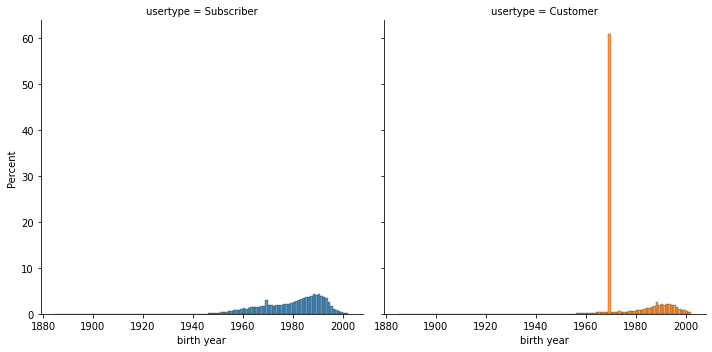

In [22]:
# plot full age range
g = sns.FacetGrid(data=df, col='usertype', hue='usertype', sharex=True, sharey=True, height=5)
g.map(sns.histplot, 'birth year', bins=range(int(df['birth year'].min()),int(df['birth year'].max())+1), stat='percent')

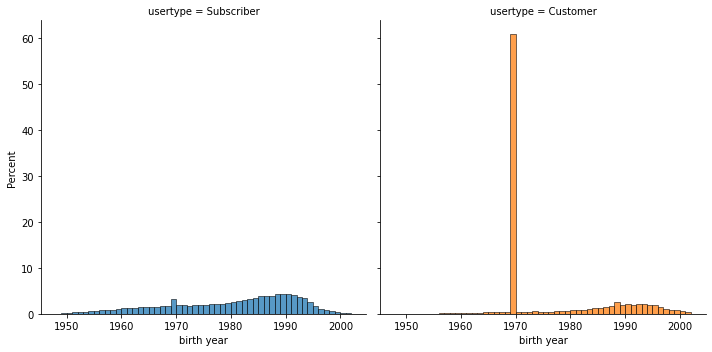

In [23]:
# plot realistic age range
g = sns.FacetGrid(data=df.loc[df['birth year']>1948,:], col='usertype', hue='usertype', sharex=True, sharey=True, height=5)
g.map(sns.histplot, 'birth year', bins=range(1948,int(df['birth year'].max())+1), stat='percent')